<a href="https://colab.research.google.com/github/RabinMahatara/InfoVis-Redesign-Project/blob/main/InfoVis_Redesign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

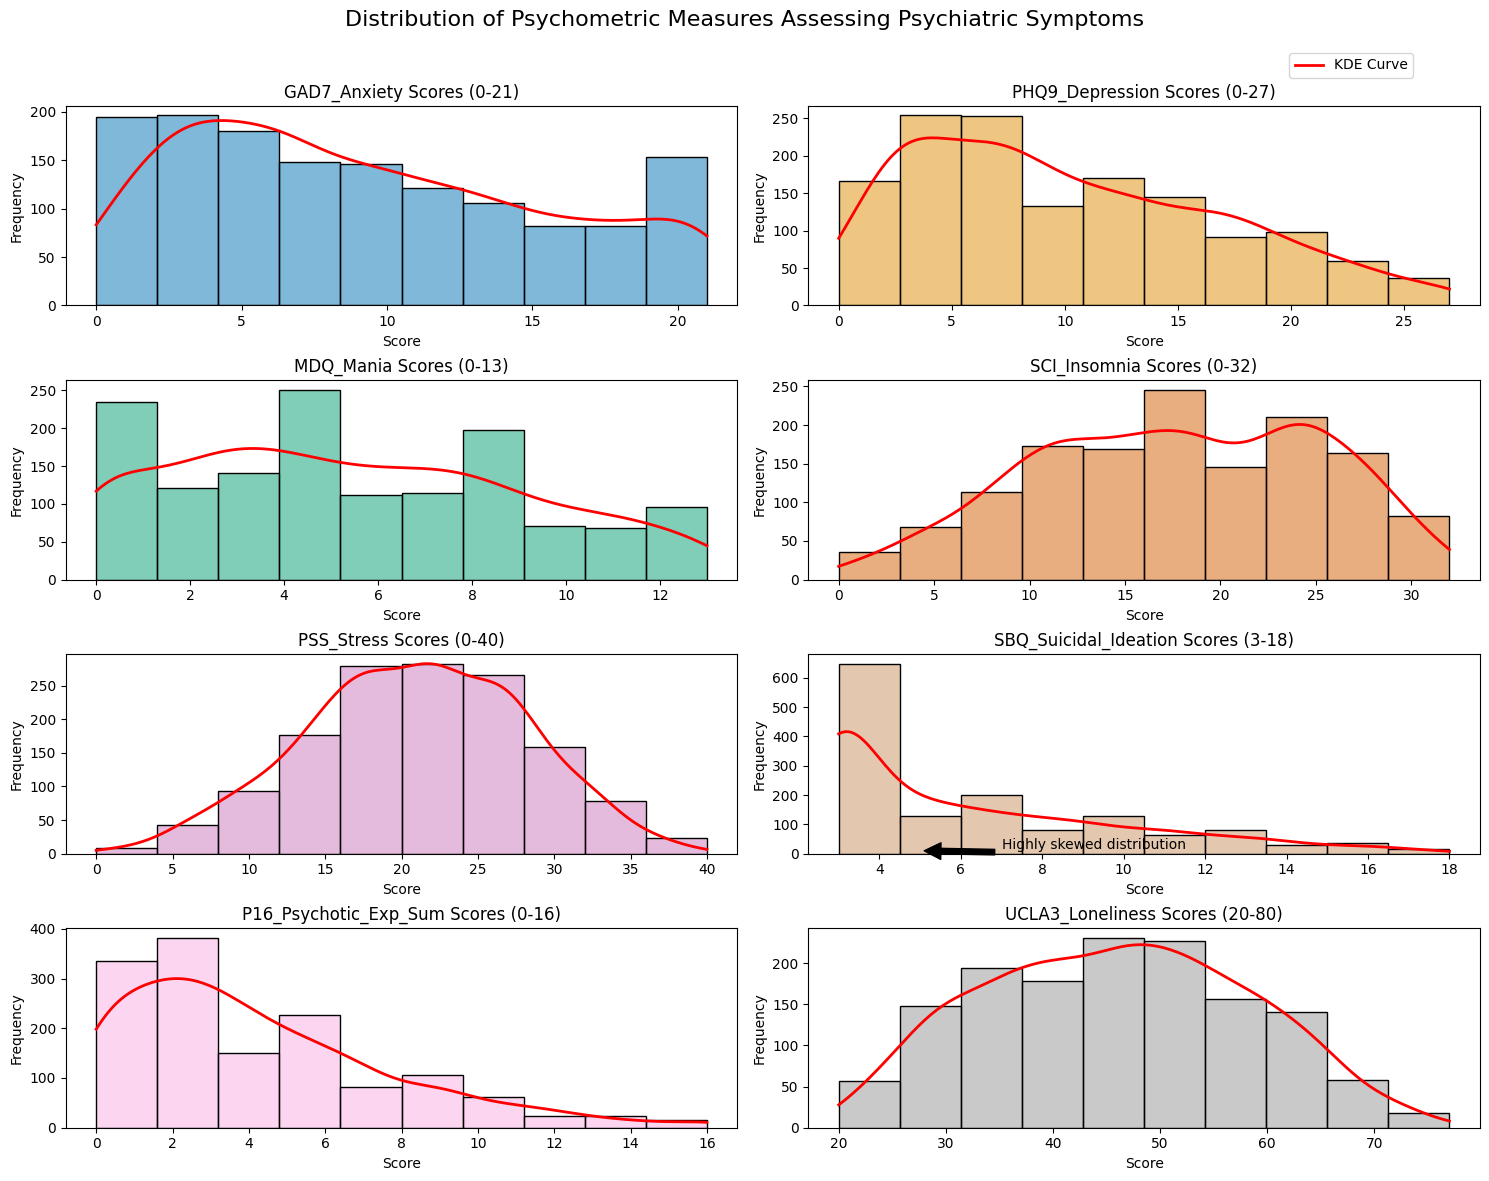

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from GitHub
url = "https://github.com/RabinMahatara/InfoVis/raw/a8eb0e7dfc2849b27afc79e92c5969e46cd773c3/Akram%20et%20al%202023%20Student%20MH%20Data%20UK%20SciData.xlsx"
df = pd.read_excel(url)

# List of measures and their score ranges
measures = ['GAD7_Anxiety', 'PHQ9_Depression', 'MDQ_Mania', 'SCI_Insomnia',
            'PSS_Stress', 'SBQ_Suicidal_Ideation', 'P16_Psychotic_Exp_Sum', 'UCLA3_Loneliness']
score_ranges = {'GAD7_Anxiety': (0, 21), 'PHQ9_Depression': (0, 27), 'MDQ_Mania': (0, 13),
                'SCI_Insomnia': (0, 32), 'PSS_Stress': (0, 40), 'SBQ_Suicidal_Ideation': (3, 18),
                'P16_Psychotic_Exp_Sum': (0, 16), 'UCLA3_Loneliness': (20, 80)}

# Create subplots for each measure
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()

# Define colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Loop through measures and create histograms with KDE
for i, measure in enumerate(measures):
    ax = axes[i]
    # Dynamically adjust binwidth based on score range
    binwidth = (score_ranges[measure][1] - score_ranges[measure][0]) / 10

    sns.histplot(df[measure], kde=True, ax=ax, color=palette[i % len(palette)], binwidth=binwidth)

    # Add labels and titles
    ax.set_title(f'{measure} Scores ({score_ranges[measure][0]}-{score_ranges[measure][1]})')
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

    # Improve KDE line visibility
    for line in ax.lines:
        line.set_color('red')
        line.set_linewidth(2)

    # Add annotations for skewed distributions or outliers if necessary
    if measure == 'SBQ_Suicidal_Ideation':
        ax.annotate('Highly skewed distribution', xy=(5, 10), xytext=(7, 15),
                    arrowprops=dict(facecolor='black', shrink=0.05))

# Adjust layout to ensure subplots fit well and add space for title
plt.tight_layout()
fig.subplots_adjust(top=0.9)  # Adjust space between title and subplots

# Add a global title for the entire figure
fig.suptitle('Distribution of Psychometric Measures Assessing Psychiatric Symptoms', fontsize=16)

# Add a global legend below the title and above all histograms on the right side
fig.legend(['KDE Curve'], loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Save plot as PNG image
plt.savefig('redesigned_visualization_with_title_and_global_legend_fixed.png', dpi=300)

# Display plot
plt.show()